In [1]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
help(mh.runners)

Help on package mlrose_hiive.runners in mlrose_hiive:

NAME
    mlrose_hiive.runners - Classes for running optimization problems.

PACKAGE CONTENTS
    _nn_runner_base
    _runner_base
    ga_border_check_front_runner
    ga_border_check_runner
    ga_js_border_check_simple_runner
    ga_js_runner
    ga_runner
    mimic_runner
    nngs_runner
    rhc_runner
    sa_runner
    skmlp_runner
    utils

FILE
    /Users/qingchuanlyu/anaconda3/envs/cs7641/lib/python3.10/site-packages/mlrose_hiive/runners/__init__.py




In [4]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [5]:
import pandas as pd
import importlib
import utility as u

In [6]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [7]:
size = 18
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [8]:

with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)


In [9]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [10]:
problem_ffp.length

18

In [11]:
problem_ffp.fitness

238.0

In [12]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[2, 4, 5],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [13]:
df_run_curves_ffp.shape

(11905, 7)

In [14]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000830,214.0,0.0,2,0.1,2048
1,1,0.010052,228.0,2.0,2,0.1,2048
2,2,0.014161,228.0,3.0,2,0.1,2048
3,3,0.020919,244.0,5.0,2,0.1,2048
4,4,0.021426,244.0,6.0,2,0.1,2048


In [15]:
df_run_curves_ffp['Fitness'].max()

420.0

In [16]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9760,1953,0.223569,420.0,1985.0,5,0.1,2048
9761,1954,0.224710,420.0,1986.0,5,0.1,2048
9762,1955,0.226119,420.0,1987.0,5,0.1,2048
9763,1956,0.227021,420.0,1988.0,5,0.1,2048
9764,1957,0.229498,420.0,1989.0,5,0.1,2048
...,...,...,...,...,...,...,...
9851,2044,0.288830,420.0,2076.0,5,0.1,2048
9852,2045,0.289187,420.0,2077.0,5,0.1,2048
9853,2046,0.289547,420.0,2078.0,5,0.1,2048
9854,2047,0.289905,420.0,2079.0,5,0.1,2048


In [17]:
# need to check Time and FEvals

In [18]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [19]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
9760,1953,0.223569,420.0,1985.0,5,0.1,2048
9761,1954,0.224710,420.0,1986.0,5,0.1,2048
9762,1955,0.226119,420.0,1987.0,5,0.1,2048
9763,1956,0.227021,420.0,1988.0,5,0.1,2048
9764,1957,0.229498,420.0,1989.0,5,0.1,2048
...,...,...,...,...,...,...,...
9851,2044,0.288830,420.0,2076.0,5,0.1,2048
9852,2045,0.289187,420.0,2077.0,5,0.1,2048
9853,2046,0.289547,420.0,2078.0,5,0.1,2048
9854,2047,0.289905,420.0,2079.0,5,0.1,2048


In [20]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,5,0.1,1985.0,2000.5,0.223569


In [21]:
# tentatively, pick pop size = 5 and mutation_rate = 0.1

In [22]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000830,214.0,0.0,2,0.1,2048
1,1,0.010052,228.0,2.0,2,0.1,2048
2,2,0.014161,228.0,3.0,2,0.1,2048
3,3,0.020919,244.0,5.0,2,0.1,2048
4,4,0.021426,244.0,6.0,2,0.1,2048


In [23]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [24]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5], # 20 bits in total
              mutation_rates=[0.1])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [25]:
df_iter_curves_ffp.shape

(18368, 7)

In [26]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000440,214.0,0.0,5,0.1,2048
1,1,0.009045,245.0,2.0,5,0.1,2048
2,2,0.012759,267.0,4.0,5,0.1,2048
3,3,0.016710,267.0,5.0,5,0.1,2048
4,4,0.017760,281.0,7.0,5,0.1,2048


In [27]:
df_iter_curves_ffp.Fitness.max()

422.0

In [28]:
df_iter_curves_ffp.to_csv(f'ga_js_{size}.csv')

In [29]:
df_iter_curves_ffp.Iteration.max()

2048

In [30]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [31]:
df_fitness_iter_ffp.shape

(2049, 3)

In [32]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,216.1,727.877778
1,1,233.9,142.988889
2,2,237.8,297.288889
3,3,238.7,255.788889
4,4,241.5,323.833333


In [33]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

1635    1635
1636    1636
1637    1637
1638    1638
1639    1639
        ... 
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, Length: 747, dtype: int64

In [34]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [35]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,216.1,727.877778,26.979210
1,1,233.9,142.988889,11.957796
2,2,237.8,297.288889,17.242067
3,3,238.7,255.788889,15.993401
4,4,241.5,323.833333,17.995370


Text(0, 0.5, 'Fitness')

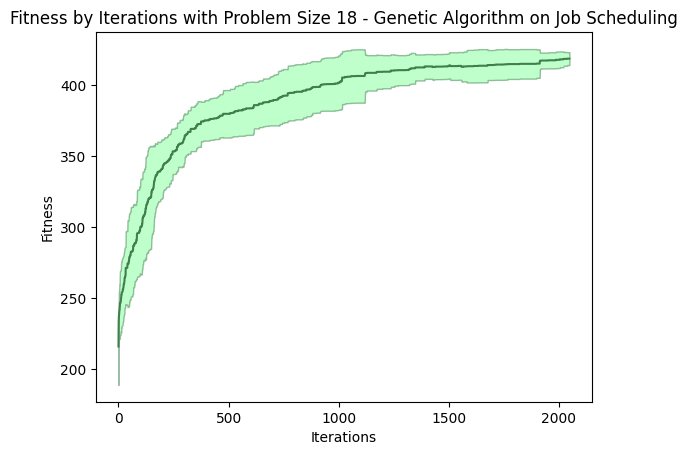

In [37]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [63]:
df_fitness_iter_ffp.avg_fitness.max()

418.5

In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    375.1
Name: avg_fitness, dtype: float64

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [41]:
df_fitness_iter_ffp.stddev_fitness.max()

36.219853364940306

In [42]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

36.219853364940306

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(142    142
 143    143
 144    144
 145    145
 146    146
 147    147
 148    148
 Name: Iteration, dtype: int64,)

In [44]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

142    142
143    143
144    144
145    145
146    146
147    147
148    148
Name: Iteration, dtype: int64

In [45]:
# Fevals - iteration

In [46]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [47]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [48]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.6,0.266667
2,2,2.9,0.766667
3,3,4.0,1.111111
4,4,5.3,1.122222


In [49]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [50]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 5.734883511361729)

In [51]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.6,0.266667,0.516398
2,2,2.9,0.766667,0.875595
3,3,4.0,1.111111,1.054093
4,4,5.3,1.122222,1.059350


Text(0, 0.5, 'FEvals')

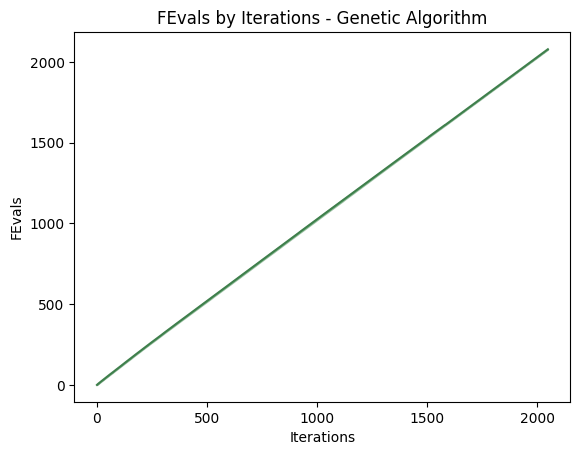

In [52]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [53]:
# fitness - wall clock time

In [54]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [55]:
df_time_iter_ffp.shape

(2049, 3)

In [56]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000435,6.943640e-08
1,1,0.004285,4.963903e-06
2,2,0.008466,1.465403e-05
3,3,0.012227,1.739576e-05
4,4,0.013062,1.881964e-05


In [57]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [58]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000435,6.943640e-08,0.000264
1,1,0.004285,4.963903e-06,0.002228
2,2,0.008466,1.465403e-05,0.003828
3,3,0.012227,1.739576e-05,0.004171
4,4,0.013062,1.881964e-05,0.004338


Text(0, 0.5, 'Time')

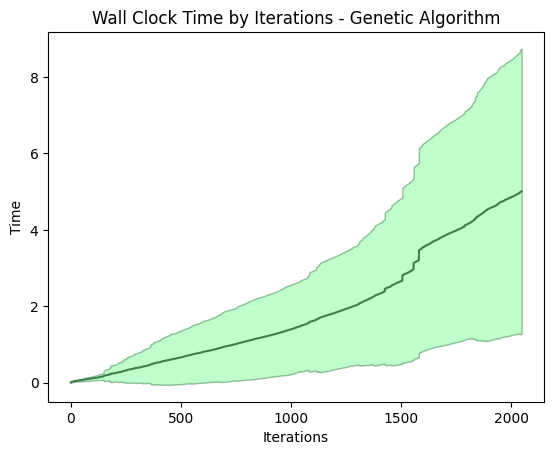

In [59]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [60]:
df_time_iter_ffp.stddev_time.max()

3.732832638987786

In [61]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,0.658759,0.490193,0.700138


In [62]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

2048    2048
Name: Iteration, dtype: int64